In [10]:
import pandas as pd

df = pd.read_csv('data/AirPassengers.csv')

In [11]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
df['Month'] = pd.to_datetime(df.Month)
df.rename({'#Passengers':'Passengers'}, axis=1, inplace=True)

In [13]:
df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
#Auto correlation from scratch

df['ShiftedUp3'] = df.Passengers.shift(-3)
df.head()

,Passengers,ShiftedUp3
Month,,
1949-01-01,112,129.0
1949-02-01,118,121.0
1949-03-01,132,135.0
1949-04-01,129,148.0
1949-05-01,121,148.0


In [16]:
df.corr()

,Passengers,ShiftedUp3
Passengers,1.000000,0.837395
ShiftedUp3,0.837395,1.000000


In [17]:
df['ShiftedUp12'] = df.Passengers.shift(-12)
df.head()

,Passengers,ShiftedUp3,ShiftedUp12
Month,,,
1949-01-01,112,129.0,115.0
1949-02-01,118,121.0,126.0
1949-03-01,132,135.0,141.0
1949-04-01,129,148.0,135.0
1949-05-01,121,148.0,125.0


In [18]:
df.corr()
#Some yearly trend, 12 has a much higher correlation than 3

,Passengers,ShiftedUp3,ShiftedUp12
Passengers,1.000000,0.837395,0.990527
ShiftedUp3,0.837395,1.000000,0.819794
ShiftedUp12,0.990527,0.819794,1.000000


In [19]:
df['ShiftedUp24'] = df.Passengers.shift(-24)
df.head()
df.corr()

,Passengers,ShiftedUp3,ShiftedUp12,ShiftedUp24
Passengers,1.000000,0.837395,0.990527,0.983254
ShiftedUp3,0.837395,1.000000,0.819794,0.783646
ShiftedUp12,0.990527,0.819794,1.000000,0.989026
ShiftedUp24,0.983254,0.783646,0.989026,1.000000


In [20]:
#Autocorrelation using in-built pandas function

df.Passengers.autocorr(12) #Auto correlation with 12 month lag

0.9905273692085446

<Axes: >

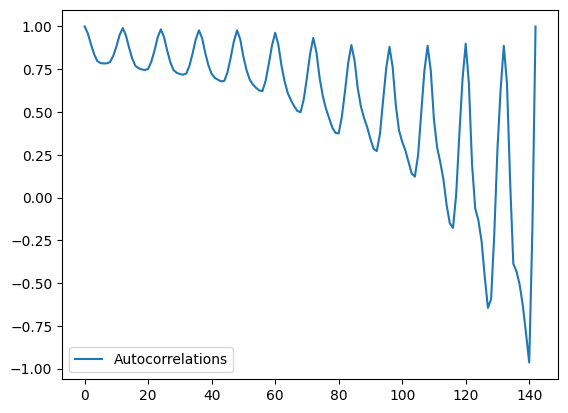

In [22]:
acs = pd.DataFrame({'Autocorrelations':[df.Passengers.autocorr(n) for n in range(143)]})
acs.plot()

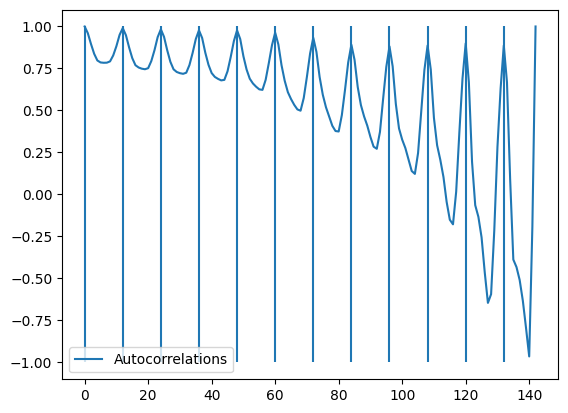

In [23]:
#Most correlation when lags are multiples of 12 - yearly pattern

acs.plot().vlines(range(0,143,12), -1, 1)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

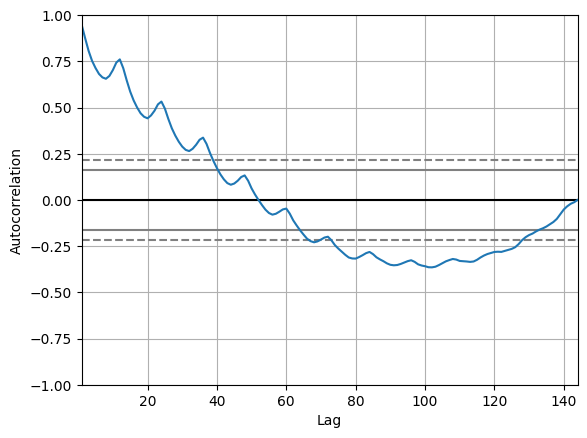

In [24]:
#Alternative way to plot

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df[['Passengers']])

Does not give accurate representation because it uses the overal series mean for de-meaning

On the other hand, the by-hand plotting uses the respective mean for de-meaning, giving a more accurate picture